<a href="https://colab.research.google.com/github/Aport77/MIPT_lab/blob/main/lab_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Аналитика данных с помощью `pandas` и `matplotlib`

В этом задании вам предлагается выполнить анализ данных криптовалют с помощью библиотек pandas и matplotlib.
Задание выглядит как лабораторная работа, в которой вам предстоит заполнить недостающие клетки и ответить на ряд вопросов.
 - [Официальная документация pandas](https://pandas.pydata.org/)
 - [Официальная документация matplotlib](https://matplotlib.org/index.html)

## Внимание! Attention! Achtung!

**Данная лабораторная работа является блокирующей**, т.е. если лабораторная работа не выполнена, то оценка за курс - неуд.

Лабораторная работа считается выполненной, если набран как минимум 1 балл.

## Формат сдачи лабораторной работы

Данная лабораторная работа сдается так же, как и проект:
- заполняете данный ноутбук
- создаете приватный репозиторий в GitHub
- добавляете в него проверяющего
- загружаете заполненный ноутбук в отдельную ветку
- создаете MR с указанием проверяющего

**Ассистенты не будут запускать ячейки кода, а смотреть на выведенный результат и код. Если ячейка кода не запущена - балл не ставится, даже при правильно написанном коде.**

## 1. Данные (2 балла)

Скачиваем данные для работы:

In [ ]:
!pip install gdown==4.6.0

  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6


In [ ]:
%%bash
gdown 1l-vkTaM1sK0g2jWHkwiFWDtWjCrac9uM

Downloading...
From: https://drive.google.com/uc?id=1l-vkTaM1sK0g2jWHkwiFWDtWjCrac9uM
To: /content/coins.csv
100%|██████████| 3.98M/3.98M [00:00<00:00, 183MB/s]


Начнем с необходимых приготовлений.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import ipywidgets  # Библиотека для интерактивных контролов в jupyter notebook'е

%matplotlib inline

In [ ]:
!pip install mplfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 1.1 MB/s eta 0:00:00


#### Загрузите заранее подготовленный датасет из файла `coins.csv`. Создайте объект типа `pandas.DataFrame` с именем `coins` и в качестве индекса выберите колонку с датой.

In [ ]:
from datetime import date
coins = pd.read_csv('/content/coins.csv')
coins.index= coins['date']
coins.index.name = 'datetime'

Посмотрим что получилось

In [ ]:
coins.head(4)

,date,price,txCount,txVolume,activeAddresses,symbol,name,open,high,low,close,volume,market
datetime,,,,,,,,,,,,,
2013-04-28,2013-04-28,135.30,41702.0,6.879868e+07,117984.0,BTC,Bitcoin,135.30,135.98,132.10,134.21,0.0,1.500520e+09
2013-04-28,2013-04-28,4.30,9174.0,4.431952e+07,17216.0,LTC,Litecoin,4.30,4.40,4.18,4.35,0.0,7.377340e+07
2013-04-29,2013-04-29,134.44,51602.0,1.138128e+08,86925.0,BTC,Bitcoin,134.44,147.49,134.00,144.54,0.0,1.491160e+09
2013-04-29,2013-04-29,4.37,9275.0,3.647810e+07,18395.0,LTC,Litecoin,4.37,4.57,4.23,4.38,0.0,7.495270e+07


Поясним значения хранящиеся в колонках
 - date - дата измерений
 - name - полное название монеты
 - symbol - сокращенное название монеты
 - price - средняя цена монеты за торговый день в USD
 - txCount - количество транзакций в сети данной монеты
 - txVolume - объем монет переведенных между адресами в сети данной монеты
 - activeAddresses - количество адресов совершавших а данный день транзации в сети данной монеты
 - open - цена монеты в начале торгов данного дня
 - close - цена монеты в конце торгов данного дня
 - high - самая высокая цена данной монеты в течение данного торгового дня
 - low - самая низкая цена данной монеты в течение данного торгового дня
 - volume - объем торгов данной монетой на биржах в данный день
 - market - капитализация данной монеты в данный день

Изучим полученные данные. Ответьте на следующие вопросы (вставляйте клетки с кодом и тектом ниже):

### 1. Сколько всего различных монет представлено в датасете? (0.4 балла)

In [ ]:
# Paste your code here
print(len(coins['name'].unique()))

70


### 2. За какой период данные мы имеем? (0.4 балла)

In [ ]:
# Paste your code here
#coins.sort_values(['date'], ascending=[False])
print(' С ', coins['date'][0], ' по ' ,coins['date'][-1])

 С  2013-04-28  по  2018-06-06


### 3. Есть ли пропуски в данных? Какой природы эти пропуски, чем они скорее всего вызваны? (0.5 балла)

In [ ]:
# Paste your code here
print('Процент пропусков данных по столбцам следующий:')
(coins.isnull().sum()/len(coins)).round(4)*100

Процент пропусков данных по столбцам следующий:


date               0.00
price              0.87
txCount            4.04
txVolume           4.87
activeAddresses    4.04
symbol             0.00
name               0.00
open               0.00
high               0.00
low                0.00
close              0.00
volume             0.00
market             0.00
dtype: float64

### 4. У какой монеты и когда была самая высокая цена? (0.2 балла)

In [ ]:
# Paste your code here
print(coins['name'][coins['high'] == coins['high'].max()].values.tolist())
coins['date'][coins['high'] == coins['high'].max()].values.tolist()

['Bitcoin']


['2017-12-17']

### 5. У какой монеты самая высокая и самая низкая средняя капитализация (среднее арифметическое капитализаций за все доступные дни)? Постройте круговую диаграмму с долями. (0.5 балла)

Самая низкая средняя капитализация у KingN Coin , а самая большая - у Bitcoin


([<matplotlib.patches.Wedge at 0x793b998d8f70>,
 [Text(0.7591092027361617, 1.4650096307947158, 'Bitcoin'),
  Text(-1.5837704140721849, 0.46278642537310966, 'Bitcoin Cash'),
  Text(-1.47255494491171, -0.7443668008556474, 'Bitcoin Gold'),
  Text(-1.1486838524290948, -1.1844937345417468, 'Cardano'),
  Text(-0.5952765206053453, -1.538878118635779, 'EOS'),
  Text(0.7198630645439269, -1.4846875658890077, 'Ethereum'),
  Text(1.5218320741050735, -0.6375948072444213, 'Litecoin'),
  Text(1.5872313384503363, -0.4507734222879103, 'NEO'),
  Text(1.6185500287211616, -0.32061784811006316, 'Others'),
  Text(1.6430454898103077, -0.15133247640214703, 'TRON')],
 [Text(0.41405956512881537, 0.799096162251663, '34.8%'),
  Text(-0.8638747713121007, 0.2524289592944234, '21.4%'),
  Text(-0.8032117881336599, -0.40601825501217126, '2.6%'),
  Text(-0.626554828597688, -0.6460874915682254, '8.0%'),
  Text(-0.3246962839665519, -0.8393880647104247, '4.7%'),
  Text(0.3926525806603237, -0.8098295813940041, '21.4%'),
  

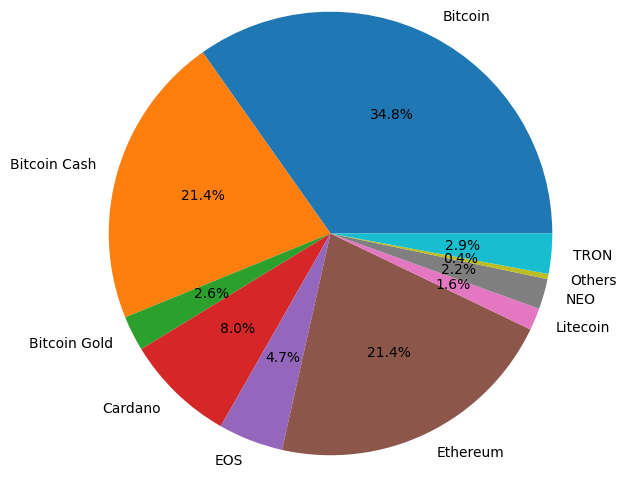

In [ ]:
# Paste your code here
small = coins.groupby('name').mean('market')
small['new_name']=small.index
small.loc[small['market'] < 1.259400e+09, 'new_name'] = 'Others'
print('Самая низкая средняя капитализация у', small.sort_values(by=['market']).index[0], ', а самая большая - у' ,small.sort_values(by=['market']).index[-1])

small.reset_index(inplace=True)
small = small.groupby('new_name').mean('market')

labels = small.index
sizes = small['market']

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', radius=1.5)



## 2. Визуализация (1 балл)

Самая интересная часть работы аналитика состоит во внимательном вглядывании в правильно выбранные и построенные графики.

**Реализуйте функцию для визуализации цен выбранной валюты за выбранный диапазон дат.**

На графике должны быть видны цены начала и конца продаж. А так же минимальная и максимальная цена за этот день.
Подпишите график и оси координат. Добавьте сетку. Увеличьте размер изображения.
Можете попробовать использовать `candlestick_ohlc` (`from mplfinance.original_flavor import candlestick_ohlc`), но можно и без него.

In [ ]:
import matplotlib.dates as mpl_dates
import datetime
from mplfinance.original_flavor import candlestick_ohlc

def plot_fancy_price_action(coins, symbol, start_date, end_date):
    # Paste your code here
    small_candle = coins[(coins.symbol ==symbol) & (coins.date>=start_date) & (coins.date<=end_date)]
    small_candle.reset_index(inplace=True)
    DATA = small_candle[['date','open', 'high', 'low', 'close']]
    DATA['date'] = pd.to_datetime(DATA['date'])
    DATA['date'] = DATA['date'].apply(mpl_dates.date2num)
    DATA = DATA.astype(float)
    # fig, f1 = plt.subplots()
    fig, f1 = plt.subplots(figsize=(10, 6))
    candlestick_ohlc(f1, DATA.values, width=1.0, colorup='green', colordown='red',  alpha=0.8)

    f1.set_xlabel('Дата')
    f1.set_ylabel('Цена')
    Title=str('График криптовалюты '+symbol+' c '+start_date+' по ' +end_date)
    fig.suptitle(Title)

    date_format = mpl_dates.DateFormatter('%d-%m-%Y')
    f1.xaxis.set_major_formatter(date_format)

    fig.autofmt_xdate()
    fig.tight_layout()
    plt.grid(True)
    plt.show()
    return plot_fancy_price_action

Посмотрим, что получилось:

<ipython-input-53-b2c575de3f44>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DATA['date'] = pd.to_datetime(DATA['date'])
<ipython-input-53-b2c575de3f44>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DATA['date'] = DATA['date'].apply(mpl_dates.date2num)


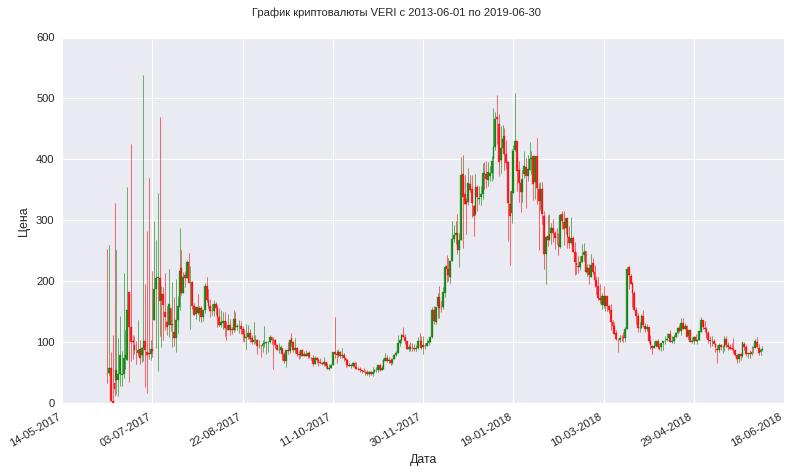

<function __main__.plot_fancy_price_action(coins, symbol, start_date, end_date)>

In [ ]:
plot_fancy_price_action(coins=coins, symbol='VERI', start_date='2013-06-01', end_date='2019-06-30')

Никакого датасаенса в этом задании нет. Просто аналитик должен уметь строить графики, либо знать готовые инструменты.

## 3. Накачка и сброс (1 балл)

Криптовалютные биржи до сих пор остаются маргинальным местом, эдаким диким западом финансового мира. Как следствие, здесь процветают схемы относительно
честного отъема денег. Одна из них - **pump'n'dump** (накачка и сброс).

Она выглядит следуюшим образом. Несколько крупных игроков или много мелких договариваются вместе купить малоизвестную монету с низкой ценой и объемом торгов. Это приводит к мгновенному взлету цены (pump), далее приходят неопытные игроки в надежде успеть заработать на таком росте. В этот момент организаторы схемы начнают все продавать (dump). Весь процесс занимает от нескольких минут до нескольких часов.

Ваша задача -- **найти самый сильный pump'n'dump** монеты на заданном промежутке времени. Для этого для каждого дня определим число `pnd` равное отношению максимальной цены монеты в данный день к максимуму из цен открытия и закрытия в тот же день. Нужно найти день, когда `pnd` был максимален и величину `pnd`.

In [ ]:
def find_most_severe_pump_and_dump(coins, symbol, start_date, end_date):
    # Paste your code here
    small_pnd = coins[(coins.symbol ==symbol) & (coins.date>=start_date) & (coins.date<=end_date)]
    mm=small_pnd.loc[:,['open','close']]
    mm['minmax']=mm.max(axis=1)
    small_pnd = pd.concat([small_pnd,mm], axis=1)
    small_pnd['pnd']=small_pnd['high']/small_pnd['minmax']
    small_pnd
    print(symbol, small_pnd['date'][small_pnd['pnd'] == small_pnd['pnd'].max()].values.tolist())
    return find_most_severe_pump_and_dump

In [ ]:
find_most_severe_pump_and_dump(coins, symbol='BTC', start_date='2017-06-01', end_date='2018-06-01')

BTC ['2017-11-29']


<function __main__.find_most_severe_pump_and_dump(coins, symbol, start_date, end_date)>

Сравните эти значения для разных монет:

In [ ]:
print('Самый сильный pump-n-dump для других криптовалют в период с 2017-06-01 по 2018-06-01 произошел: ')
find_most_severe_pump_and_dump(coins, symbol='LTC', start_date='2017-06-01', end_date='2018-06-01')
find_most_severe_pump_and_dump(coins, symbol='DOGE', start_date='2017-06-01', end_date='2018-06-01')
find_most_severe_pump_and_dump(coins, symbol='VTC', start_date='2017-06-01', end_date='2018-06-01')
find_most_severe_pump_and_dump(coins, symbol='DASH', start_date='2017-06-01', end_date='2018-06-01')

Самый сильный pump-n-dump для других криптовалют в период с 2017-06-01 по 2018-06-01 произошел: 
LTC ['2018-02-07']
DOGE ['2017-12-17']
VTC ['2017-10-22']
DASH ['2017-11-29']


<function __main__.find_most_severe_pump_and_dump(coins, symbol, start_date, end_date)>

## 4. Окупаемость инвестиций (1 балл)

Вам нужно посчитать **окупаемость инвестиций (ROI)** в криптовалюты на заданном промежутке времени.

Окупаемость определяется как отношение *изменения цены портфеля* к *исходной цене портфеля*. Цена портфеля - это суммарная стоимость (в USD) всех монет в портфеле.

`investments` - словарь, в котором ключи - это названия монет, значения - это сумма вложений в эту монету (в USD).

In [ ]:
def compute_roi(coins, investments, start_date, end_date):
    # Paste your code here
    sum_ROI=0
    sum_invest=0
    for key, value in investments.items():
        a=(key, value)
        coin=a[0]
        invest=a[1]
        small_roi=coins[(coins.symbol ==coin)]
        small_roi.reset_index(inplace=True)
        s=small_roi.iloc[small_roi.index[small_roi['date']== start_date].tolist()]['price']
        e=small_roi.iloc[small_roi.index[small_roi['date']== end_date].tolist()]['price']
        ROI=invest*e.values[0]/s.values[0]
        sum_ROI += ROI
        sum_invest += invest
    print((sum_ROI-sum_invest)/sum_invest)
    return(compute_roi)

In [ ]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2018-04-04', end_date='2018-06-01')

-0.035569133065275614


<function __main__.compute_roi(coins, investments, start_date, end_date)>

In [ ]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2013-05-28', end_date='2018-06-06')

51.28330296529592


<function __main__.compute_roi(coins, investments, start_date, end_date)>

## 5. Технический анализ (1 балл)

**Технический анализ** - это способ предсказания поведения графика по некоторым вспомогательным величинам построенным по исходному графику. Один из простейших методов технического анализа - **[границы Боллинджера](https://en.wikipedia.org/wiki/Bollinger_Bands)**. Кто-то верит, что график касаясь границы от него должен отражаться.

Границы считаются очень просто:

$$(MA \pm K\sigma),$$

где `MA` - скользящее среднее за `N` дней, а $\sigma$ - скользящее стандартное отклонение за `N` дней.

Нарисуйте **график цены**, **скользящее среднее** и **границы Боллинджера** c параметрами `N (window) = 21`, `K (width) = 2`.

Тут вам поможет функция `rolling` для подсчёта среднего и стандартного отклонения по скользящему окну.

Не забудьте подписать график и оси, отрисовать легенду и выбрать для нее лучшее расположение.

In [ ]:
def plot_bollinger_bands(coins, symbol, window, width):
    # Paste your code here
    small_bol = coins[(coins.symbol ==symbol)]
    small_bol['SMA']=small_bol['open'].rolling(window=window).mean()
    small_bol.reset_index(inplace=True)
    DATA = small_bol[['date','open', 'high', 'low', 'close','SMA']]
    DATA['date'] = pd.to_datetime(DATA['date'])
    DATA['date'] = DATA['date'].apply(mpl_dates.date2num)
    DATA = DATA.astype(float)

    DATA['stdev']=DATA['open'].rolling(window=window).std()
    DATA['+stdev']=DATA['SMA']+(DATA['stdev']*width)
    DATA['-stdev']=DATA['SMA']-(DATA['stdev']*width)

    # fig, f1 = plt.subplots()
    fig, f1 = plt.subplots(figsize=(10, 6))

    plt.plot(DATA['date'], DATA['open'], label='Цена открытия')
    plt.plot(DATA['date'], DATA['SMA'], label='Скользящая средняя')
    plt.plot(DATA['date'], DATA['+stdev'], label='Скользящая средняя+СО')
    plt.plot(DATA['date'], DATA['-stdev'], label='Скользящая средняя-СО')

    f1.set_xlabel('Дата')
    f1.set_ylabel('Цена')
    Title=str('График криптовалюты '+symbol)
    fig.suptitle(Title)

    date_format = mpl_dates.DateFormatter('%d-%m-%Y')
    f1.xaxis.set_major_formatter(date_format)

    fig.autofmt_xdate()

    fig.tight_layout()
    plt.grid(True)
    f1.legend(loc='upper left')
    plt.show()
    return  plot_bollinger_bands

<ipython-input-51-88667102deb0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small_bol['SMA']=small_bol['open'].rolling(window=window).mean()
<ipython-input-51-88667102deb0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DATA['date'] = pd.to_datetime(DATA['date'])
<ipython-input-51-88667102deb0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

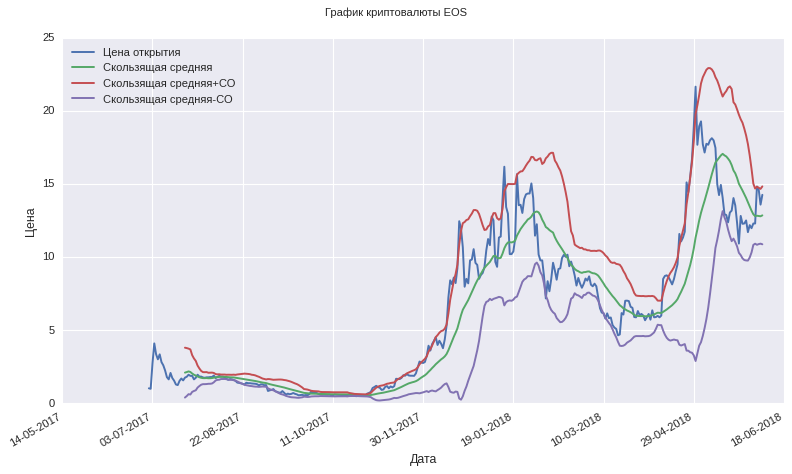

<function __main__.plot_bollinger_bands(coins, symbol, window, width)>

In [ ]:
plot_bollinger_bands(coins=coins, symbol='EOS', window=21, width=2)  # тут должен появиться график

**Сделайте вывод о том, выполнялось ли правило Боллинджера:**

** **Текст, выделенный полужирным шрифтом**Ваш ответ тут**

## 6. Капитализация как индикатор (1 балл)

Многие люди, которые торгуют криптовалютой, любят смотреть на [капитализацию](https://academy.binance.com/ru/articles/crypto-market-capitalization-explained). Давайте поймём почему.

**Нарисуйте еще два графика:**
1. общая капитализация биткойна (BTC), эфира (ETH), еос (EOS), биткойн кэша (BCH), стеллара (XLM) и лайткойна (LTC)
2. доли капитализаций этих монет от общей капитализации рынка.

При этом используйте данные начиная с 2017-07-01.

In [ ]:
def plot_coins_capitalizations(coins, symbols, start_date):
    # Paste your code here
    small_cap=coins[(coins.date>=start_date)]
    small_cap.reset_index(inplace=True)
    small_sum = small_cap.groupby(['date']).agg(['sum'])['market']

    fig, f1 = plt.subplots(2, 1, figsize=(14, 4))
    plt.subplots_adjust(left=None, bottom=1, right=None, top=4, wspace=None, hspace=None)

    for symbol in symbols:

        small_market = small_cap.loc[small_cap['symbol']==symbol, ['market', 'date']]
        small_market = pd.merge(small_market, small_sum, how='left', left_on='date', right_on='date')
        f1[0].plot(small_market['date'],  small_market['market'], label = symbol)
        f1[1].plot(small_market['date'],  small_market['market']/small_market['sum']*100, label = symbol)

    f1[0].set_xlabel('Дата')
    f1[0].set_ylabel('Капитализация')
    f1[1].set_xlabel('Дата')
    f1[1].set_ylabel('Доля капитализации монет, %')
    f1[0].title.set_text('Динамика капитализации монет')
    f1[1].title.set_text('Динамика доли капитализации монет')
    f1[0].set_xticks(small_market['date'][::small_market.shape[0]//10])
    f1[1].set_xticks(small_market['date'][::small_market.shape[0]//10])
    f1[0].grid(True)
    f1[1].grid(True)
    f1[0].legend(loc='upper right')
    f1[1].legend(loc='upper right')
    plt.show()
    return plot_coins_capitalizations

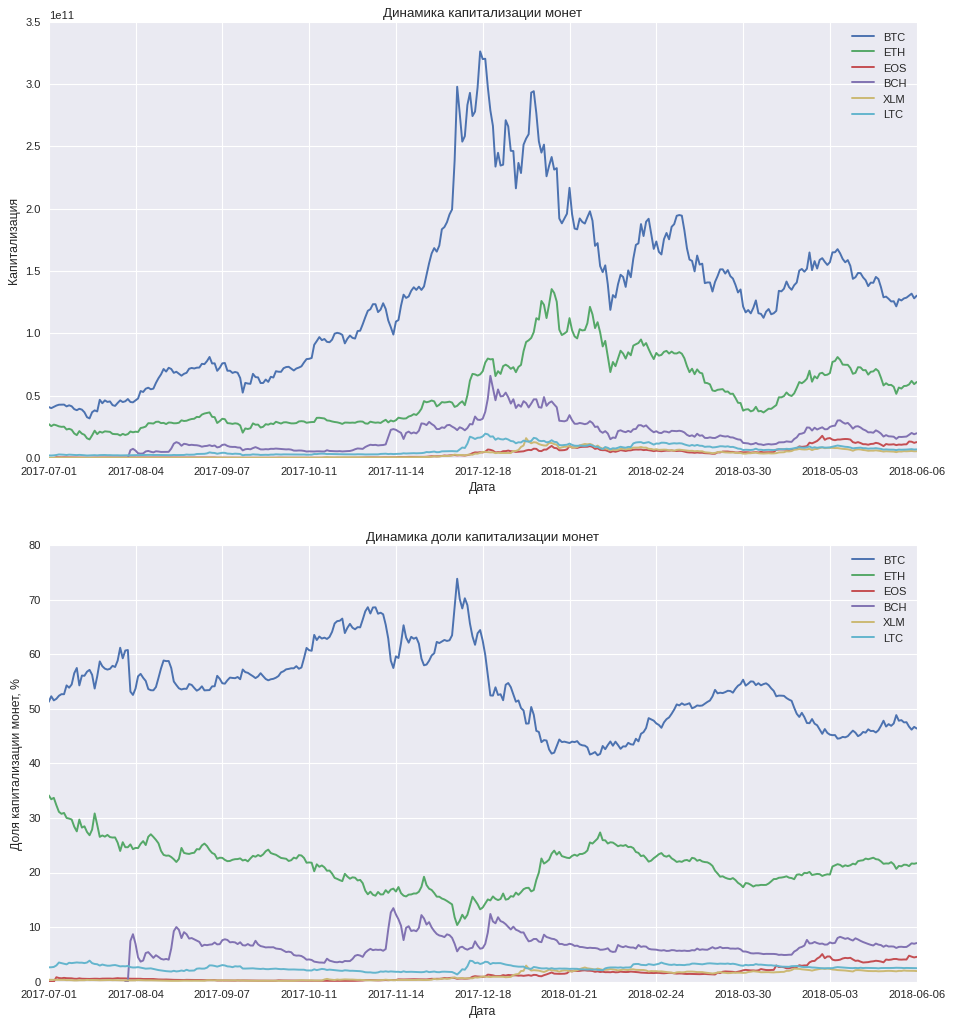

<function __main__.plot_coins_capitalizations(coins, symbols, start_date)>

In [ ]:
plot_coins_capitalizations(
    coins=coins,
    symbols=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC'),
    start_date='2017-07-01'
)

Проанализируйте зависимость доли капитализации альткойнов (остальных монет, кроме биткойна) от доли капитализации биткойна. Как выдумаете, в чём причина такой зависимости?

**Ваш ответ тут**

## 7. Корреляции монет (1 балл)

Теперь нужно подробнее посмотреть на корреляции средних долей капитализаций монет. При этом будем смотреть на среднее сглаженное за последние `window` дней до дня `date` с коэффициентом сглаживания `alpha` для набора монет `symbols`.

Реализуйте функцию, которая будет возвращать квадратный `DataFrame` с числом строк и столбцов, равным числу рассматриваемых монет и со значениями корреляций:

In [ ]:

def calc_coins_correlations(coins, date, symbols, window, alpha):
    # Paste your code here
    small_cap=coins[(coins.date<=date)]
    small_cap.reset_index(inplace=True)
    small_sum = small_cap.groupby(['date']).agg(['sum'])['market']
    db=pd.DataFrame(columns=['market', 'date','symbol'])
    for symbol in symbols:

        small_market = small_cap.loc[small_cap['symbol']==symbol, ['market', 'date','symbol']]
        small_market = pd.merge(small_market, small_sum, how='left', left_on='date', right_on='date')
        db=pd.concat([db, small_market], axis=0)

    db['EWM']=db['sum'].ewm(alpha==alpha, min_periods=window).mean()
    db=pd.DataFrame(db, columns=['symbol','EWM'])
    db_corr=db.pivot_table(index=db.index, columns=['symbol'], values=['EWM'])
    cr=db_corr.corr()
    return cr

In [ ]:
correlations = calc_coins_correlations(coins, date="2018-06-06",
                                       symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                       window=21, alpha=0.1)
# Теперь посмотрим на эти корреляции следующим образом:
# correlations.style.background_gradient(cmap='coolwarm').set_precision(2)
correlations.style.background_gradient(cmap='coolwarm').format(precision=2)

Довольно интересно ещё взглянуть на 2017-12-27:

In [ ]:
correlations = calc_coins_correlations(coins, date="2017-12-27",
                                       symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                       window=21, alpha=0.1)
# Теперь посмотрим на эти корреляции следующим образом:
correlations.style.background_gradient(cmap='coolwarm').set_precision(2)

<ipython-input-60-c2d058096282>:5: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  correlations.style.background_gradient(cmap='coolwarm').set_precision(2)


## 8. Анализ одной стратегии (2 балла)

Разберем один мечтательный пример. Посмотрим какую прибыль могла бы нам принести хрестоматийная торговая стратегия, основанная на скользящих средних.

Стратегия выглядит следующим образом: мы строим две скользящие среднии для графика цены. С маленьким окном (ведущее скользящее среднее) и с бОльшим окном (запаздывающее скользящее среднее). **Мы покупаем, когда ведущее среднее становится больше запаздывающего, и продаем в противном случае.**

Посмотрим на пример:

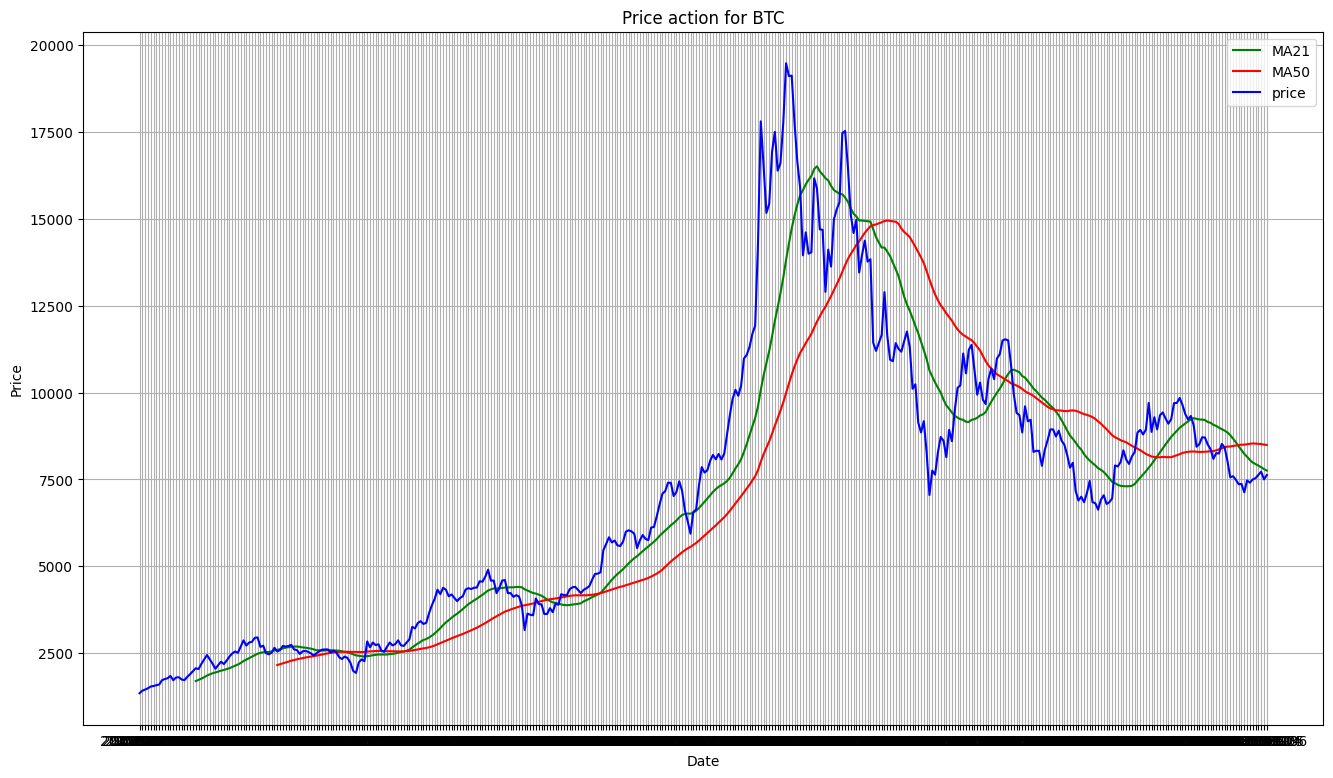

In [ ]:
def plot_moving_averages(coins, symbol, leading_window, lagging_window, start_date, end_date):
    coin = coins[coins['symbol'] == symbol][start_date:end_date]
    price = coin['price']
    leading_mean = price.rolling(window=leading_window).mean()
    lagging_mean = price.rolling(window=lagging_window).mean()

    fig = plt.figure(figsize=(16, 9))
    ax = fig.add_subplot(111)

    ax.set_title('Price action for {}'.format(symbol))
    ax.plot(leading_mean, color='green', label='MA{}'.format(leading_window))
    ax.plot(lagging_mean, color='red', label='MA{}'.format(lagging_window))
    ax.plot(price, color='blue', label='price')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.legend(loc='best')
    ax.grid(True)
    plt.show()

plot_moving_averages(
    coins=coins,
    symbol='BTC',
    leading_window=21,
    lagging_window=50,
    start_date='2017-05-01',
    end_date='2018-08-01')

Видно, что скользящее среднее с бОльшим окном медленнее реагирует на изменение цены. Именно на этой идее и основана торговая стратегия/


**Реализуйте функцию**, которая строит два графика. На правом будут изображены цена и скользящие средние. На левом - во сколько раз изменится размер вложений при использовании нашей стратегии и при обычном инвестировании (купили и держим, смотрим как растет цена наших купленных валют).

Иными словами сравниваем 2 подхода:
- сразу в начальный момент времени купить крипты на все деньги - обычное инвестирование
- ждать подходящих моментов и покупать только в них равными порциями - стратегия

Считайте, что суммарное количество вложенных денег в обоих подходах одинаковое.

>**Примечания:**
>- Давайте использовать только цены закрытия. При этом, чтобы узнать цены за вчерашний день, стоит использовать метод `shift(1)` у `Series`.
>- Отношение цен закрытия за сегодня и за вчера - это **multiplier** за сегодняшний день. При этом давайте строить графики накопления для multiplier-ов. Т.е. если мы смотрим на 3 дня и в первый день multiplier = 1.5, во второй - 0.5 и в третий - 2, то график будет выглядеть так: (1.5, 1.5 * 0.5, 1.5 * 0.5 * 2).
>- При использовании нашей новой стратегии мы будем либо покупать, если ведущее среднее становится больше запаздующего на некоторый `threshold` (при этом лучше разницу сперва поделить на цену), либо оставлять всё как есть. При этом, конечно, нужно, принимая решения за сегодняшний день, смотреть только на статистику из прошлого.

In [ ]:
def plot_moving_averages_strategy(
    coins, symbol, lead_window, lag_window, threshold, start_date, end_date
):
    # Paste your code here

In [ ]:
# Теперь на основе реализованной функции сделаем интерактивные графики и поизучаем, что получилось:
symbol_selector = ipywidgets.Dropdown(
    options=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'),
    index=0,
    value='BTC',
    layout={'width': '700px'},
    continuous_update=False
)

lead_window_slider = ipywidgets.IntSlider(
    value=21,
    min=1,
    max=200,
    step=1,
    layout={'width': '700px'},
    continuous_update=False)

lag_window_slider = ipywidgets.IntSlider(
    value=50,
    min=1,
    max=200,
    layout={'width': '700px'},
    step=1, continuous_update=False)

threshold_slider = ipywidgets.FloatSlider(
    min=0,
    max=0.20,
    step=0.001,
    value=0.025,
    layout={'width': '700px'},
    continuous_update=False)

start_date_slider = ipywidgets.SelectionSlider(
    options=pd.date_range('2013-04-28', '2018-06-06', freq='D'),
    index=0,
    value=pd.Timestamp('2017-05-01'),
    layout={'width': '700px'},
    continuous_update=False
)

end_date_slider = ipywidgets.SelectionSlider(
    options=pd.date_range('2013-04-28', '2018-06-06', freq='D'),
    index=0,
    value=pd.Timestamp('2018-01-01'),
    layout={'width': '700px'},
    continuous_update=False
)

ipywidgets.interact(
    plot_moving_averages_strategy,
    coins=ipywidgets.fixed(coins),
    symbol=symbol_selector,
    lead_window=lead_window_slider,
    lag_window=lag_window_slider,
    threshold=threshold_slider,
    start_date=start_date_slider,
    end_date=end_date_slider
)

Попробуйте разные значения параметров для разных монет и сделайте выводы о применимости такой модели:

**Ваш ответ тут**

## 9. Отказ от ответственности

Все примеры разобранных здесь стратегий являются игрушечными и не подходят для реальной торговли на бирже. Без серьезной подготовки вас там съедят с потрохами.